In [1]:
import os
import cv2
import imghdr
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
image_data = []
labels = []

In [3]:
# Load and preprocess the data
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
            else:
                img = cv2.resize(img, (256, 256))  # Resize the image if needed
                image_data.append(img)
                labels.append(image_class)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [4]:
# Convert the data to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

In [5]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(image_data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [6]:
# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [10]:
# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_flat, y_train)

SVC(kernel='linear')

In [11]:
# Make predictions on the validation set
y_val_pred = svm_model.predict(X_val_flat)

# Evaluate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.9314324507807196


In [ ]:
# Make predictions on the test set
y_test_pred = svm_model.predict(X_test_flat)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

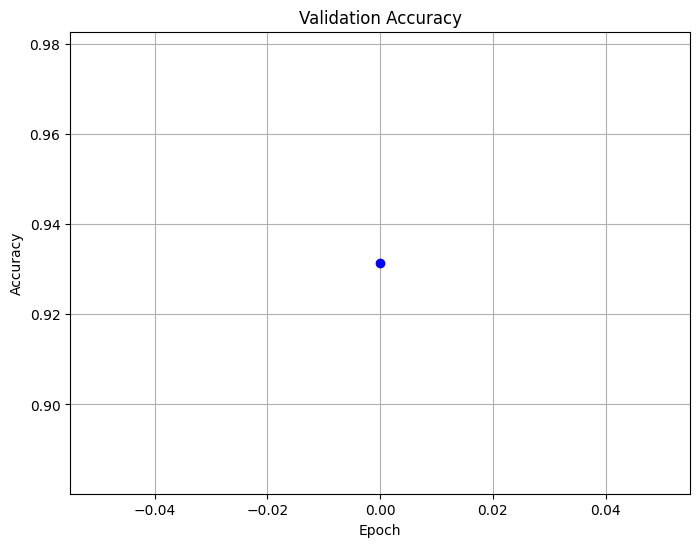

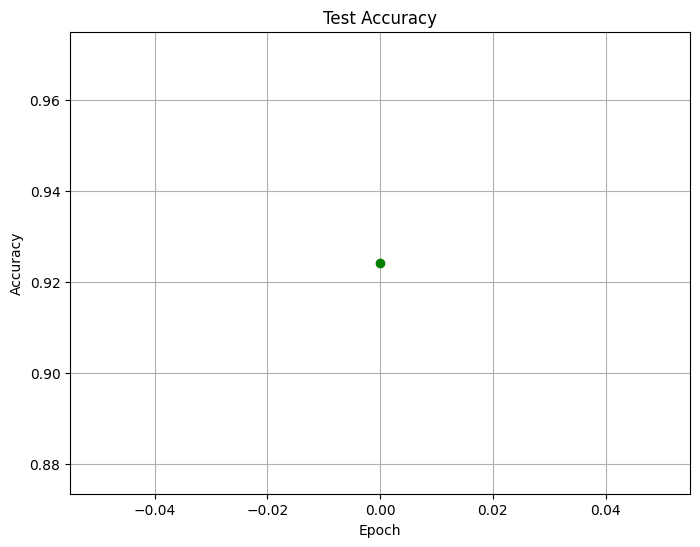

In [12]:

# Plot validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(val_accuracy, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot test accuracy
plt.figure(figsize=(8, 6))
plt.plot(test_accuracy, marker='o', linestyle='-', color='g')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

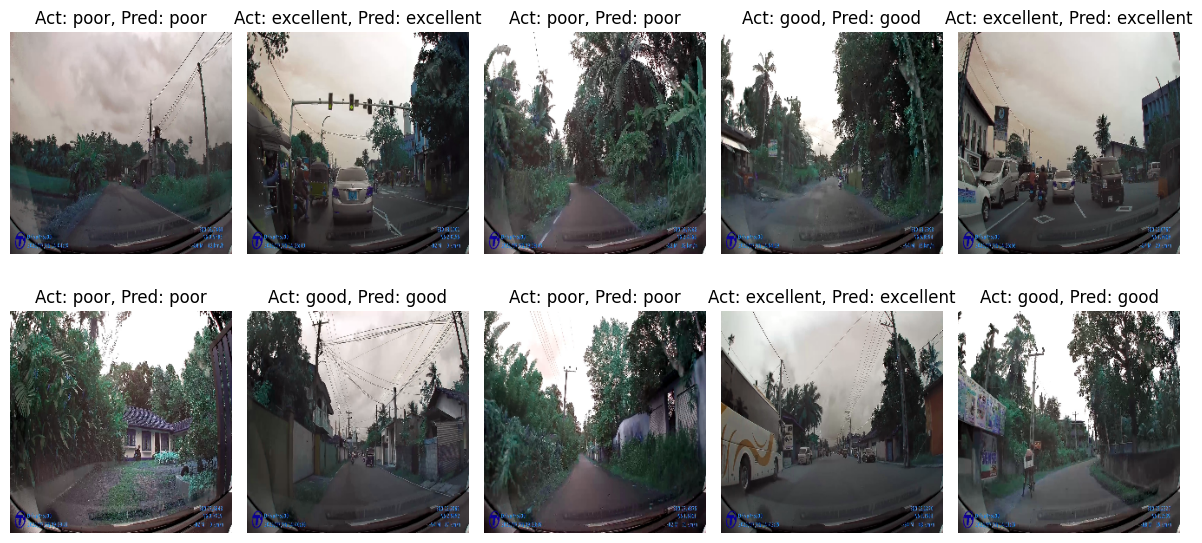

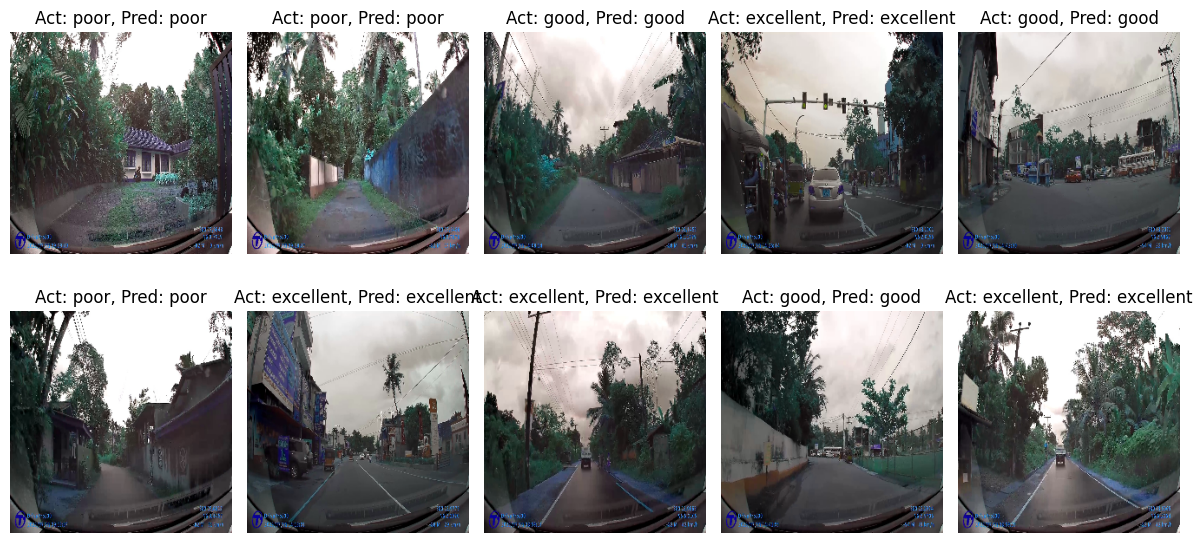

In [17]:
# Plot some images with their predictions on validation data
plt.figure(figsize=(12, 6))
for i in range(10):  # Change the range to the number of images you want to visualize
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_val[i])
    plt.title(f'Act: {y_val[i]}, Pred: {y_val_pred[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot some images with their predictions on test data
plt.figure(figsize=(12, 6))
for i in range(10):  # Change the range to the number of images you want to visualize
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f'Act: {y_test[i]}, Pred: {y_test_pred[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()